In [1]:
import sys
import os

sys.path.insert(0, "/home/krzysiek/Development/claim-modelling-kedro/claim_modelling_kedro/notebooks/utils")
sys.path.insert(0, "/home/krzysiek/Development/claim-modelling-kedro/claim_modelling_kedro/src")

from utils.my_kedro import MyKedro, suppress_all_loggers
import logging

logger = logging.getLogger(__name__)
logger.setLevel("INFO")

my_kedro = MyKedro()

[05/30/25 12:03:47] INFO                    context.py:L91       mlflow_config.server.mlflow_tracking_uri:         
                             http://127.0.0.1:5000

                    INFO                    context.py:L106      mlflow_run_id: a2a7f7638a854ea4beeffce158e1463f

[05/30/25 12:03:48] INFO                   __init__.py:L134      Kedro project solvency-models

                    INFO                   __init__.py:L135      Defined global variable 'context', 'session',     
                             'catalog' and 'pipelines'

                    INFO                   my_kedro.py:L125      Reloaded kedro. Active mlflow_run_id:             
                             a2a7f7638a854ea4beeffce158e1463f

In [2]:
!pwd

/home/krzysiek/Development/claim-modelling-kedro/claim_modelling_kedro


In [3]:
my_kedro.reload()

[05/30/25 12:03:48] INFO                    context.py:L91       mlflow_config.server.mlflow_tracking_uri:         
                             http://127.0.0.1:5000

                    INFO                    context.py:L106      mlflow_run_id: a2a7f7638a854ea4beeffce158e1463f

                    INFO                   __init__.py:L134      Kedro project solvency-models

                    INFO                   __init__.py:L135      Defined global variable 'context', 'session',     
                             'catalog' and 'pipelines'

                    INFO                   my_kedro.py:L125      Reloaded kedro. Active mlflow_run_id:             
                             a2a7f7638a854ea4beeffce158e1463f

In [4]:
my_kedro.run("init", level="ERROR")

{}

In [5]:
config = catalog.load("config")

[05/30/25 12:03:50] INFO               data_catalog.py:L483      Loading data from config (PickleDataset)...

In [6]:
# my_kedro.run("de")

In [7]:
catalog.list()


[
    'config',
    'raw_features_and_claims_numbers_df',
    'raw_severities_df',
    'features_blacklist_text',
    'reference_categories',
    'features_df',
    'targets_df',
    'target_df',
    'train_policies',
    'calib_policies',
    'test_policies',
    'train_keys',
    'calib_keys',
    'test_keys',
    'sample_keys',
    'sample_features_df',
    'sample_target_df',
    'transformed_sample_features_df',
    'sample_train_keys',
    'sample_val_keys',
    'selected_sample_features_df',
    'best_haprams',
    'pure_sample_predictions_df',
    'pure_calib_predictions_df',
    'calibrated_calib_predictions_df',
    'pure_train_predictions_df',
    'calibrated_train_predictions_df',
    'pure_test_predictions_df',
    'calibrated_test_predictions_df',
    'train_target_df',
    'test_target_df',
    'train_predictions_df',
    'test_predictions_df',
    'dummy_test_1_df',
    'dummy_test_2_df',
    'dummy_summary_1_df',
    'dummy_summary_2_df',
    'parameters',
    'params

In [8]:
from typing import List, Tuple
import pandas as pd

In [7]:
# !pip install git+https://github.com/krzpiesiewicz/timeseries

In [9]:

from timeseries.plotting import plot_ts

In [10]:
from timeseries import plot_ts

In [11]:
from claim_modelling_kedro.experiments.experiment import create_experiment_run, default_run_name_from_run_no, get_run_mlflow_id

In [12]:
from claim_modelling_kedro.pipelines.utils.dataframes import (
    load_metrics_table_from_mlflow,
    load_predictions_and_target_from_mlflow,
    load_metrics_cv_stats_from_mlflow
)
from claim_modelling_kedro.pipelines.utils.datasets import (
    get_partition,
    get_mlflow_run_id_for_partition,
)

In [13]:
def get_list_of_mlflow_runs_ids(experiment_name: str, run_names_lst: List[str]):
    return [get_run_mlflow_id(experiment_name, run_name) for run_name in run_names_lst]


def load_predictions_and_targets_lst_from_mlflow(run_ids_lst: List[str], dataset: str) -> Tuple[List[pd.DataFrame], List[pd.DataFrame]]:
    predictions_dfs = []
    target_dfs = []
    for run_id in run_ids_lst:
        predictions_df, target_df = load_predictions_and_target_from_mlflow(dataset=dataset, mlflow_run_id=run_id)
        predictions_dfs.append(predictions_df)
        target_dfs.append(target_df)
    return predictions_dfs, target_dfs


def load_metrics_cv_stats_lst_from_mlflow(run_ids_lst: List[str], dataset: str) -> List[pd.DataFrame]:
    return [load_metrics_cv_stats_from_mlflow(dataset=dataset, mlflow_run_id = run_id) for run_id in run_ids_lst]

In [14]:
import numpy as np

experiment_name = "exp_001_freq_glm_trg_ratio_clb_poisson"
p_lst = []
template_parameters_lst = []
run_name_lst = []
trg_size = 19000

for i, p in enumerate([None, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]):
    p_lst.append(p)
    template_parameters_lst.append({"SAMPLING_TARGET_RATIO": f"{p}" if p is not None else "",
                                   "SAMPLING_N_OBS": f"{int(np.floor(trg_size / p))}" if p is not None else "540000"})
    run_name_lst.append(default_run_name_from_run_no(experiment_name=experiment_name, run_no=i + 1, suffix=f"p_{p}"))

exp1_name = experiment_name
exp1_run_names = run_name_lst
    
for run_name, template_parameters in zip(run_name_lst, template_parameters_lst):
    create_experiment_run(experiment_name=experiment_name, run_name=run_name, template_parameters=template_parameters)

create_experiment_run(experiment_name=experiment_name, run_name="dummy", template_parameters={"SAMPLING_TARGET_RATIO": "0.5",
                                   "SAMPLING_N_OBS": "40000"})

[05/30/25 12:04:23] ERROR                experiment.py:L67       Templates directory                               
                             'experiments/experiment_name/templates' does not exist. No templates to fill.

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:19                                                                                   │
│                                                                                                  │
│   16 exp1_run_names = run_name_lst                                                               │
│   17                                                                                             │
│   18 for run_name, template_parameters in zip(run_name_lst, template_parameters_lst):            │
│ ❱ 19 │   create_experiment_run(experiment_name=experiment_name, run_name=run_name, template_p    │
│   20                                                                                             │
│   21 create_experiment_run(experiment_name=experiment_name, run_name="dummy", template_parame    │
│   22 │   │   │   │   │   │   │   │      "SAMPLING_N_OBS": "40000"})                              │
│                                                                                                  │
│ /home/krzysiek/Development/claim-modelling-kedro/claim_modelling_kedro/src/claim_modelling_kedro │
│ /experiments/experiment.py:68 in create_experiment_run                                           │
│                                                                                                  │
│    65 │   if not os.path.exists(templates_dir):                                                  │
│    66 │   │   msg = f"Templates directory '{templates_dir}' does not exist. No templates to fi   │
│    67 │   │   logger.error(msg)                                                                  │
│ ❱  68 │   │   raise FileNotFoundError(msg)                                                       │
│    69 │                                                                                          │
│    70 │   # Update the placeholder for the name of the mlflow experiment                         │
│    71 │   template_parameters.update(MLFLOW_EXPERIMENT_NAME=experiment_name, MLFLOW_RUN_NAME=r   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
FileNotFoundError: Templates directory 'experiments/experiment_name/templates' does not exist. No templates to 
fill.

In [25]:
import numpy as np

experiment_name = "exp_002_freq_glm_trg_ratio_clb_isotonic"
p_lst = []
template_parameters_lst = []
run_name_lst = []
trg_size = 19000

for i, p in enumerate([None, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]):
    p_lst.append(p)
    de_ds_run_id = get_run_mlflow_id(exp1_name, exp1_run_names[i])
    template_parameters_lst.append({"SAMPLING_TARGET_RATIO": f"{p}" if p is not None else "",
                                   "SAMPLING_N_OBS": f"{int(np.floor(trg_size / p))}" if p is not None else "540000",
                                   "MLFLOW_RUN_ID_DE_DS": de_ds_run_id})
    run_name_lst.append(default_run_name_from_run_no(experiment_name=experiment_name, run_no=i + 1, suffix=f"p_{p}"))

exp2_name = experiment_name
exp2_run_names = run_name_lst

# for run_name, template_parameters in zip(run_name_lst, template_parameters_lst):
#     create_experiment_run(experiment_name=experiment_name, run_name=run_name, template_parameters=template_parameters)

# create_experiment_run(experiment_name=experiment_name, run_name="dummy", template_parameters={"SAMPLING_TARGET_RATIO": "0.5",
#                                    "SAMPLING_N_OBS": "40000"})

[09/26/24 16:38:54] INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=995282;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=532176;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00001_p_None:                                  
                             3fb0455b363a485091122b26766ecd93                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=5442;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=60069;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00002_p_0.05:                                  
                             ed7b047762ec4df48911a03e13999f9e                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=383470;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=840676;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00003_p_0.1:                                   
                             077dde0a1cb84d50a3a8c61b630018b1                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=525872;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=334276;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00004_p_0.15:                                  
                             c8322ff4aaeb4653af3cd9e12e44711f                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=613605;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=232769;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00005_p_0.2:                                   
                             2d2c61f6906b4147a03a47437c91d105                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=961447;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=322515;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00006_p_0.25:                                  
                             c06ec5e04d324a57a14fa1020d8169a5                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=456676;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=319132;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00007_p_0.3:                                   
                             00b55b62393b4aa38c541a4297ca26a1                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=907873;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=304454;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00008_p_0.35:                                  
                             a7240d656134413b89b122feabfd5d5a                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=312337;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=405043;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00009_p_0.4:                                   
                             146a05f44b234c33a6db1069a761cdf9                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=314650;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=11323;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00010_p_0.45:                                  
                             c8dfe18165fe461b877b4dce302e0f32                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=607837;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=429077;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00011_p_0.5:                                   
                             de4f31a09f334a6d8a51c435eec254ce                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=350112;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=6401;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00012_p_0.55:                                  
                             0f06cd98df574eebbca70271ff17c951                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=376113;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=381328;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00013_p_0.6:                                   
                             c18068d681ed4ff5864587919d87012d                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=635647;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=189338;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00014_p_0.65:                                  
                             7a3c0b3171f442fbaeaf22e870e81965                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=308810;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=172848;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00015_p_0.7:                                   
                             8c77266a38fb4c988be1671706eb65aa                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=27729;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=848008;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00016_p_0.75:                                  
                             00b07cd2cc2446b5ac566ab83ced567d                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=195872;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=716742;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00017_p_0.8:                                   
                             1760fb7bccf24fe6866c4d76aa174f29                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=784642;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=284310;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00018_p_0.85:                                  
                             99645ca1c8574a9f800ea57c372f9a93                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=455903;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=912159;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00019_p_0.9:                                   
                             b1f9f52b043a46138f72d6b8c716d428                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=384297;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=222160;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00020_p_0.95:                                  
                             8f66aa5518c64081b5a71e7f926b5359                                                      

                    INFO     Filled templates copied to                                            ]8;id=476296;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=138009;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_002_freq_glm_trg_ratio_clb_isotonic/runs/dummy/filled                 
                             _templates.                                                                           

                    INFO     Created experiment run directory:                                     ]8;id=743387;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=165407;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_002_freq_glm_trg_ratio_clb_isotonic/runs/dummy.                       

In [64]:
import numpy as np

experiment_name = "exp_003_freq_glm_trg_ratio_clb_cir"
p_lst = []
template_parameters_lst = []
run_name_lst = []
trg_size = 19000

for i, p in enumerate([None, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]):
    p_lst.append(p)
    de_ds_run_id = get_run_mlflow_id(exp1_name, exp1_run_names[i])
    template_parameters_lst.append({"SAMPLING_TARGET_RATIO": f"{p}" if p is not None else "",
                                   "SAMPLING_N_OBS": f"{int(np.floor(trg_size / p))}" if p is not None else "540000",
                                   "MLFLOW_RUN_ID_DE_DS": de_ds_run_id})
    run_name_lst.append(default_run_name_from_run_no(experiment_name=experiment_name, run_no=i + 1, suffix=f"p_{p}"))

exp3_name = experiment_name
exp3_run_names = run_name_lst
    
for run_name, template_parameters in zip(run_name_lst, template_parameters_lst):
    create_experiment_run(experiment_name=experiment_name, run_name=run_name, template_parameters=template_parameters)

create_experiment_run(experiment_name=experiment_name, run_name="dummy", template_parameters={"SAMPLING_TARGET_RATIO": "0.5",
                                   "SAMPLING_N_OBS": "40000"})

[09/26/24 17:23:03] INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=247420;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=694662;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00001_p_None:                                  
                             3fb0455b363a485091122b26766ecd93                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=760382;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=771775;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00002_p_0.05:                                  
                             ed7b047762ec4df48911a03e13999f9e                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=638157;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=72028;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00003_p_0.1:                                   
                             077dde0a1cb84d50a3a8c61b630018b1                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=933332;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=534010;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00004_p_0.15:                                  
                             c8322ff4aaeb4653af3cd9e12e44711f                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=627610;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=910713;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00005_p_0.2:                                   
                             2d2c61f6906b4147a03a47437c91d105                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=48252;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=514565;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00006_p_0.25:                                  
                             c06ec5e04d324a57a14fa1020d8169a5                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=320200;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=3265;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00007_p_0.3:                                   
                             00b55b62393b4aa38c541a4297ca26a1                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=60291;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=415754;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00008_p_0.35:                                  
                             a7240d656134413b89b122feabfd5d5a                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=905750;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=652672;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00009_p_0.4:                                   
                             146a05f44b234c33a6db1069a761cdf9                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=408120;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=486189;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00010_p_0.45:                                  
                             c8dfe18165fe461b877b4dce302e0f32                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=607731;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=964046;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00011_p_0.5:                                   
                             de4f31a09f334a6d8a51c435eec254ce                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=222396;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=166366;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00012_p_0.55:                                  
                             0f06cd98df574eebbca70271ff17c951                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=640006;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=169766;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00013_p_0.6:                                   
                             c18068d681ed4ff5864587919d87012d                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=377761;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=814599;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00014_p_0.65:                                  
                             7a3c0b3171f442fbaeaf22e870e81965                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=872224;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=75209;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00015_p_0.7:                                   
                             8c77266a38fb4c988be1671706eb65aa                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=284506;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=54280;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00016_p_0.75:                                  
                             00b07cd2cc2446b5ac566ab83ced567d                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=521824;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=624162;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00017_p_0.8:                                   
                             1760fb7bccf24fe6866c4d76aa174f29                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=73810;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=101904;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00018_p_0.85:                                  
                             99645ca1c8574a9f800ea57c372f9a93                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=485049;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=872718;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00019_p_0.9:                                   
                             b1f9f52b043a46138f72d6b8c716d428                                                      

                    INFO     MLflow Run ID for exp_001_freq_glm_trg_ratio_clb_poisson, Run        ]8;id=833462;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=386847;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_001_freq_glm_trg_ratio_clb_poisson_00020_p_0.95:                                  
                             8f66aa5518c64081b5a71e7f926b5359                                                      

                    INFO     Filled templates copied to                                            ]8;id=677841;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=664686;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00001_p_None/filled_templates.                                      

                    INFO     Created experiment run directory:                                     ]8;id=95589;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=298434;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00001_p_None.                                                       

                    INFO     Filled templates copied to                                            ]8;id=983588;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=942621;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00002_p_0.05/filled_templates.                                      

                    INFO     Created experiment run directory:                                     ]8;id=527087;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=160587;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00002_p_0.05.                                                       

                    INFO     Filled templates copied to                                            ]8;id=84069;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=70894;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00003_p_0.1/filled_templates.                                       

                    INFO     Created experiment run directory:                                     ]8;id=782036;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=946232;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00003_p_0.1.                                                        

[09/26/24 17:23:04] INFO     Filled templates copied to                                            ]8;id=44902;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=86924;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00004_p_0.15/filled_templates.                                      

                    INFO     Created experiment run directory:                                     ]8;id=775000;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=318730;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00004_p_0.15.                                                       

                    INFO     Filled templates copied to                                            ]8;id=104055;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=701697;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00005_p_0.2/filled_templates.                                       

                    INFO     Created experiment run directory:                                     ]8;id=111292;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=808876;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00005_p_0.2.                                                        

                    INFO     Filled templates copied to                                            ]8;id=441837;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=929420;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00006_p_0.25/filled_templates.                                      

                    INFO     Created experiment run directory:                                     ]8;id=470746;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=258065;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00006_p_0.25.                                                       

                    INFO     Filled templates copied to                                            ]8;id=320334;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=869005;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00007_p_0.3/filled_templates.                                       

                    INFO     Created experiment run directory:                                     ]8;id=567988;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=412707;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00007_p_0.3.                                                        

                    INFO     Filled templates copied to                                            ]8;id=428574;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=331119;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00008_p_0.35/filled_templates.                                      

                    INFO     Created experiment run directory:                                     ]8;id=764304;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=185215;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00008_p_0.35.                                                       

                    INFO     Filled templates copied to                                            ]8;id=47164;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=411545;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00009_p_0.4/filled_templates.                                       

                    INFO     Created experiment run directory:                                     ]8;id=600240;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=329284;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00009_p_0.4.                                                        

                    INFO     Filled templates copied to                                            ]8;id=726138;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=326658;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00010_p_0.45/filled_templates.                                      

                    INFO     Created experiment run directory:                                     ]8;id=686935;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=523968;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00010_p_0.45.                                                       

                    INFO     Filled templates copied to                                            ]8;id=75184;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=149730;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00011_p_0.5/filled_templates.                                       

                    INFO     Created experiment run directory:                                     ]8;id=795342;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=185484;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00011_p_0.5.                                                        

                    INFO     Filled templates copied to                                            ]8;id=802515;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=86326;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00012_p_0.55/filled_templates.                                      

                    INFO     Created experiment run directory:                                     ]8;id=512583;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=10591;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00012_p_0.55.                                                       

                    INFO     Filled templates copied to                                            ]8;id=176792;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=468153;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00013_p_0.6/filled_templates.                                       

                    INFO     Created experiment run directory:                                     ]8;id=496442;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=262905;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00013_p_0.6.                                                        

                    INFO     Filled templates copied to                                            ]8;id=886434;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=60989;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00014_p_0.65/filled_templates.                                      

                    INFO     Created experiment run directory:                                     ]8;id=51087;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=407358;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00014_p_0.65.                                                       

                    INFO     Filled templates copied to                                            ]8;id=780198;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=928430;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00015_p_0.7/filled_templates.                                       

                    INFO     Created experiment run directory:                                     ]8;id=174033;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=822472;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00015_p_0.7.                                                        

                    INFO     Filled templates copied to                                            ]8;id=809466;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=39473;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00016_p_0.75/filled_templates.                                      

                    INFO     Created experiment run directory:                                     ]8;id=895006;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=581913;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00016_p_0.75.                                                       

                    INFO     Filled templates copied to                                            ]8;id=785104;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=529185;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00017_p_0.8/filled_templates.                                       

                    INFO     Created experiment run directory:                                     ]8;id=606455;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=58853;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00017_p_0.8.                                                        

                    INFO     Filled templates copied to                                            ]8;id=3668;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=516963;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00018_p_0.85/filled_templates.                                      

                    INFO     Created experiment run directory:                                     ]8;id=800128;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=115946;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00018_p_0.85.                                                       

                    INFO     Filled templates copied to                                            ]8;id=368454;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=955109;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00019_p_0.9/filled_templates.                                       

                    INFO     Created experiment run directory:                                     ]8;id=177924;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=442467;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00019_p_0.9.                                                        

                    INFO     Filled templates copied to                                            ]8;id=714896;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=985179;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00020_p_0.95/filled_templates.                                      

                    INFO     Created experiment run directory:                                     ]8;id=729874;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=583779;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/exp_003_freq_glm_                 
                             trg_ratio_clb_cir_00020_p_0.95.                                                       

                    INFO     Filled templates copied to                                            ]8;id=88751;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=491488;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#41\41]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/dummy/filled_temp                 
                             lates.                                                                                

                    INFO     Created experiment run directory:                                     ]8;id=782926;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=612655;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#73\73]8;;\
                             experiments/exp_003_freq_glm_trg_ratio_clb_cir/runs/dummy.                            

In [37]:
ratios_lst = p_lst.copy()
ratios_lst[0] = 0.037

In [89]:
exp1_run_ids = get_list_of_mlflow_runs_ids(exp1_name, exp1_run_names)
exp2_run_ids = get_list_of_mlflow_runs_ids(exp2_name, exp2_run_names)
exp3_run_ids = get_list_of_mlflow_runs_ids(exp3_name, exp3_run_names)

[09/26/24 18:11:56] INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=567089;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=752143;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00001_p_None:                                      
                             e1f5f1b24fe045b89ab0155e44518a57                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=576331;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=410745;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00002_p_0.05:                                      
                             8ba0ac7c2dc6456a80f6d3cc75af50ae                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=156944;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=966317;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00003_p_0.1:                                       
                             487f0b6bbcd44520be7a8caf8bf25893                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=848799;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=589256;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00004_p_0.15:                                      
                             28d9edc8fe244aa798898a13d02e659f                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=252405;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=920112;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00005_p_0.2:                                       
                             92aa45f06f3f4124b3feb55e202eb433                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=339585;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=41021;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00006_p_0.25:                                      
                             65576f7a3f964f0d86551c286eacb8f9                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=332946;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=514852;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00007_p_0.3:                                       
                             ca7381fd9b8e4908a4dd560ced20cc54                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=622646;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=35878;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00008_p_0.35:                                      
                             f49c5e8dcea24c268cc4feebd01c163d                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=213769;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=924482;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00009_p_0.4:                                       
                             03f255af2cc64a14a33ae7270765e303                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=101436;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=157964;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00010_p_0.45:                                      
                             663f0b9247fe4607924af12934457cfa                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=89434;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=498466;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00011_p_0.5:                                       
                             e3943439ca964231b336a5a2201a9bb7                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=65528;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=272557;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00012_p_0.55:                                      
                             148e6c4c7e974cd38c8d861c6acdcd32                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=782147;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=809049;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00013_p_0.6:                                       
                             0932729eb5c54b8ca22daf4b9b33ed00                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=880175;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=837742;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00014_p_0.65:                                      
                             6cace5d5000843df95bc648ae207fe04                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=317492;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=871971;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00015_p_0.7:                                       
                             33d0c99c5f0a42e3bca4d7b6cf81c11e                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=208854;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=910455;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00016_p_0.75:                                      
                             64f3a16add7647cfaa1786738e6058b2                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=206894;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=68246;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00017_p_0.8:                                       
                             7daf75e01e5c4465a037cf955b039ef7                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=236192;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=563432;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00018_p_0.85:                                      
                             1b208b60eb934183a828091f0849c5e7                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=665635;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=716165;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00019_p_0.9:                                       
                             c37475d5576949159e31e9fb2ac4f3cd                                                      

                    INFO     MLflow Run ID for exp_003_freq_glm_trg_ratio_clb_cir, Run            ]8;id=242497;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py\experiment.py]8;;\:]8;id=693611;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/experiments/experiment.py#174\174]8;;\
                             exp_003_freq_glm_trg_ratio_clb_cir_00020_p_0.95:                                      
                             21f2b8d356e34000a7a2fd03761ee482                                                      

In [90]:
exp1_predictions_dfs, exp1_target_dfs = load_predictions_and_targets_lst_from_mlflow(exp1_run_ids, "test")
exp2_predictions_dfs, exp2_target_dfs = load_predictions_and_targets_lst_from_mlflow(exp2_run_ids, "test")
exp3_predictions_dfs, exp3_target_dfs = load_predictions_and_targets_lst_from_mlflow(exp3_run_ids, "test")

[09/26/24 18:12:07] INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=828540;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=11513;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

[09/26/24 18:12:08] INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=340561;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=101927;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=17222;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=356829;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=484492;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=426709;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=786863;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=287938;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=358771;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=84251;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=819608;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=229380;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=569937;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=501382;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=651240;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=374048;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:09] INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=179695;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=465968;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=567812;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=436938;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=144279;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=524160;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=289473;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=495546;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=375192;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=377037;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=35047;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=481194;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=470388;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=933497;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:10] INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=456497;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=454902;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=43718;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=359593;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=89630;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=360606;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=486747;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=460185;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=656008;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=988366;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=381563;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=793406;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=148950;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=455795;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=805579;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=114488;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:11] INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=298033;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=951768;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=76024;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=285553;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=741125;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=233999;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=370025;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=960654;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=922579;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=168745;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=818746;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=168261;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:12] INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=980969;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=193754;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=67883;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=488178;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=474095;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=952887;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=388951;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=451070;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=134148;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=260139;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=171564;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=434799;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=149985;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=441152;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:13] INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=322706;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=714317;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=786959;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=571197;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=606063;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=334409;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=615949;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=880366;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=912544;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=217236;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=201579;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=412578;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=552542;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=981910;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=913233;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=476738;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=279191;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=602029;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:14] INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=849691;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=785189;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=712;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=333476;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=8839;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=225375;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=366896;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=186895;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=788327;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=221831;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=459655;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=728960;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=567741;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=926579;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:15] INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=181536;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=70399;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=718662;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=313208;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=237618;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=981428;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=994902;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=818048;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:16] INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=925274;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=300134;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=586077;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=635771;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=428415;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=441520;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=313173;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=792249;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=986817;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=480884;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=667917;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=338761;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=484970;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=676482;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:17] INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=976427;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=582660;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=758742;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=399359;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=464409;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=85373;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=567168;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=464961;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=583329;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=608935;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=308197;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=928513;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=997200;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=253594;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=946798;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=311347;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=501974;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=40118;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:18] INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=152651;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=623174;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=300003;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=913364;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=341520;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=164999;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=715092;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=896788;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=383776;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=58452;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=943463;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=458081;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:19] INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=401815;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=399809;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=383111;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=49314;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=342843;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=183083;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=201109;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=187409;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=342436;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=691647;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=58147;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=654377;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=280832;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=651865;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=388471;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=784473;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:20] INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=638171;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=274583;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=922564;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=35474;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=972320;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=663701;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=298176;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=597407;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=493777;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=626378;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=934700;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=332084;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=643305;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=111580;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=835791;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=756959;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:21] INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=526923;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=524343;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=96253;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=167442;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=403503;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=502895;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=29593;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=808616;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=415095;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=300209;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=420809;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=621085;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=949876;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=687560;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:22] INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=400882;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=782341;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=284310;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=884140;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=409257;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=386753;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=103168;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=395340;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=33414;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=862370;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=560497;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=971294;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=200721;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=794882;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=34568;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=530856;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=899225;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=844715;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

[09/26/24 18:12:23] INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=903314;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=855390;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=742689;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=812174;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=881333;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=400201;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=423331;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=364466;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=738262;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=567663;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=622846;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=551442;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=166260;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=908278;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=993321;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=32188;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:24] INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=553528;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=131285;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=410384;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=957378;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=889994;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=242779;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=307684;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=875040;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=123038;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=132985;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=752810;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=675037;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=577474;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=929651;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:25] INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=723919;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=885815;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=208706;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=281200;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=282834;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=160940;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=915746;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=894248;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=220290;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=658386;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=552737;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=141110;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=88030;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=564322;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=471293;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=124544;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=49519;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=121744;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:26] INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=131656;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=522865;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=72692;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=391928;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=895853;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=864524;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=489420;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=154373;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=442874;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=137125;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=978705;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=771244;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:27] INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=741945;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=648421;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=622364;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=922780;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=337234;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=503213;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=890660;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=445466;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=166216;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=817968;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=715797;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=456793;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=795911;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=440805;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:28] INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=425940;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=175666;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=923645;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=684451;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=167045;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=746752;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=487029;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=140618;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=963105;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=942814;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=388227;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=954726;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=731119;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=766879;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=995041;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=800371;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=174427;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=386257;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:29] INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=714220;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=850615;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=259717;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=733416;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=729043;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=857016;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=370321;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=987949;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=884333;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=752568;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=185222;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=558203;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:30] INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=909619;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=883960;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=895130;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=694675;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=310112;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=257785;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=842498;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=682470;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=862006;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=513804;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=674543;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=608091;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=817700;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=767496;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:31] INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=16119;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=799205;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=828503;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=87989;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=832426;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=240647;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=664527;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=351677;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=301293;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=353108;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=721002;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=580969;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=499797;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=451183;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=154789;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=441712;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=995713;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=365756;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:32] INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=871558;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=876760;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=192826;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=536171;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=753005;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=386802;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=834292;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=314412;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=261024;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=711231;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=790032;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=74762;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=637510;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=816560;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:33] INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=648135;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=451368;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=838414;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=294978;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=6676;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=619310;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=760762;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=467972;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=391301;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=787613;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=750099;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=536627;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=122632;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=195012;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=424388;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=552251;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:34] INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=146447;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=993488;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=257310;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=326867;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=493469;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=914990;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=592266;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=888020;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=42858;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=132823;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=568708;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=684003;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=424692;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=548075;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=599852;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=177568;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=395609;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=632302;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:35] INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=917573;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=674071;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=826472;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=306774;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=749488;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=491026;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=547402;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=525815;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=730751;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=576460;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=243589;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=648158;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=473838;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=285114;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:36] INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=945763;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=493906;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=267164;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=876956;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=457296;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=597703;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=801348;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=347126;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=838052;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=620493;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=17323;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=249252;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=358843;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=827535;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=755826;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=103670;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:37] INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=959390;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=104269;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=768826;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=464767;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=672617;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=826196;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=683877;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=229123;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=977156;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=38223;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=805425;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=676221;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=990777;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=133994;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=308858;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=286934;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=145373;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=328342;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:38] INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=875771;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=787205;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=71542;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=641807;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=479160;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=663326;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=472276;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=796967;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=312874;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=908336;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=326005;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=246636;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=993449;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=698008;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:39] INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=781605;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=633067;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=150600;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=241804;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=818046;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=584787;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=163143;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=321869;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=134203;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=682457;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=412009;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=836363;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=782318;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=141758;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=401615;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=417191;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=157469;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=6674;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

[09/26/24 18:12:40] INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=792513;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=879961;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=970109;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=338181;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=515263;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=660903;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=260466;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=128361;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=572689;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=616589;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=880518;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=546295;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=117646;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=357242;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=155939;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=290441;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:41] INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=158274;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=710841;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=218158;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=689361;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=881549;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=796007;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=944088;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=183552;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=801645;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=935343;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=638847;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=352740;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=27967;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=544210;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=639598;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=207443;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:42] INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=453169;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=879432;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=854112;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=944060;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=556794;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=165715;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=322607;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=198011;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=646065;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=929092;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=36915;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=619239;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=269741;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=487813;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=907995;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=353296;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=564733;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=370904;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:43] INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=602568;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=849311;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=313452;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=967357;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=446381;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=765112;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=893845;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=880127;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=271368;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=878370;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=662359;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=694732;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:44] INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=767967;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=563699;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=535288;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=176521;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=422155;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=161289;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=314165;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=344010;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=771782;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=4750;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=226446;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=586288;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=968707;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=229883;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=401862;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=708294;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=81514;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=28776;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:45] INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=753222;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=206994;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=187301;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=602430;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=868643;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=549629;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=10942;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=510582;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=821440;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=157554;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=656743;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=466959;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=243420;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=462146;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=806567;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=269481;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=87322;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=28370;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:46] INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=4167;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=56429;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=51208;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=990763;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=627702;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=683988;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=370105;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=161782;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=587176;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=695154;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=127643;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=609084;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:47] INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=301950;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=738390;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=422425;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=765939;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=255648;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=554217;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=117890;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=324597;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=602930;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=215407;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=951304;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=423075;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=412663;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=280700;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=6948;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=768832;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=105863;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=760080;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:48] INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=326477;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=348269;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=742780;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=436646;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=557349;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=365415;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=735260;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=126780;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=236352;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=809614;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=92131;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=918335;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=126426;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=287835;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=631442;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=366501;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=910379;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=491036;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:49] INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=2131;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=90265;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=948141;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=254033;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=182827;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=949477;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=579322;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=594224;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=706563;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=195783;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=330087;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=541230;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=979819;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=355016;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=899084;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=775967;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:50] INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=24815;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=21478;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=917912;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=454691;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=348389;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=142406;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=168809;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=779771;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=606082;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=141543;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=120990;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=929797;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=214900;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=517341;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=974080;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=766419;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:51] INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=774193;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=178988;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=707323;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=349857;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=440670;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=13580;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=168716;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=691195;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=986675;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=707820;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=534231;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=228753;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=392314;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=75068;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:52] INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=923201;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=627997;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=816488;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=139938;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=316176;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=786667;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=731537;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=218449;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:53] INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=175373;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=649454;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=376762;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=286314;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=958970;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=378085;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=489620;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=814287;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=957021;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=5025;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=970402;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=433732;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:54] INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=579501;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=571424;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=713574;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=79936;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=681399;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=622060;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=48122;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=700677;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=820617;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=302914;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=432793;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=607734;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=189885;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=54536;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=455586;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=26422;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:55] INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=331222;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=934961;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=241035;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=234373;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=579855;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=793325;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=490612;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=500139;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=501535;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=697705;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=664852;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=189161;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:56] INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=379745;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=545799;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=660924;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=729487;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=864565;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=871086;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=581566;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=144922;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=101416;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=717531;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=96139;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=206564;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=560974;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=915087;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=216702;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=837714;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=864385;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=841444;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:57] INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=434938;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=631400;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=634587;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=301778;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=93602;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=953685;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=555121;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=92928;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=143003;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=30267;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=331792;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=793893;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=264926;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=15981;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=937120;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=561414;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=404757;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=189098;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:58] INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=953639;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=94648;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=999024;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=295534;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=921579;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=976036;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=584854;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=591550;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=529663;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=928464;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=279587;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=389222;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=590471;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=924227;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=2130;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=521461;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:12:59] INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=949551;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=591204;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=385792;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=993749;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=511201;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=208990;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=516398;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=609;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=205255;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=408599;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=644407;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=817399;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=985320;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=867412;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=561174;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=496620;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=710592;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=33308;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=798436;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=496637;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:13:00] INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=846226;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=736143;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=701490;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=712995;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=982446;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=612364;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=332583;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=802496;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=448774;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=412856;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=901478;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=450039;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=323921;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=103575;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:13:01] INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=334229;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=235021;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=988733;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=257285;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=28925;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=307332;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=493446;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=90852;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=47254;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=486872;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=249168;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=62070;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=582482;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=869147;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=20068;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=991051;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:13:02] INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=125976;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=831167;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=824740;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=973517;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=13531;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=529634;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=529337;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=923993;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

                    INFO     Loading the predictions and the target from test dataset from MLFlow...   ]8;id=478125;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=484742;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#219\219]8;;\

                    INFO     Loading artifact predictions/test/prediction/0.pq from MLFlow...          ]8;id=667010;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=178542;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/1.pq from MLFlow...          ]8;id=284970;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=211769;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/2.pq from MLFlow...          ]8;id=878515;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=207906;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/3.pq from MLFlow...          ]8;id=779353;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=636601;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/4.pq from MLFlow...          ]8;id=653756;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=13905;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:13:03] INFO     Loading artifact predictions/test/prediction/5.pq from MLFlow...          ]8;id=167395;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=275611;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/6.pq from MLFlow...          ]8;id=352509;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=129082;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/7.pq from MLFlow...          ]8;id=729257;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=498190;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/8.pq from MLFlow...          ]8;id=105249;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=104366;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/prediction/9.pq from MLFlow...          ]8;id=528570;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=73152;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/0.pq from MLFlow...              ]8;id=660709;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=280710;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:13:04] INFO     Loading artifact predictions/test/target/1.pq from MLFlow...              ]8;id=599034;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=521429;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/2.pq from MLFlow...              ]8;id=285795;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=183207;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/3.pq from MLFlow...              ]8;id=674810;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=411273;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/4.pq from MLFlow...              ]8;id=911613;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=489092;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/5.pq from MLFlow...              ]8;id=702466;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=430811;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/6.pq from MLFlow...              ]8;id=855445;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=67679;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/7.pq from MLFlow...              ]8;id=229221;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=357134;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loading artifact predictions/test/target/8.pq from MLFlow...              ]8;id=156001;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=757171;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

[09/26/24 18:13:05] INFO     Loading artifact predictions/test/target/9.pq from MLFlow...              ]8;id=364631;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=407409;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#190\190]8;;\

                    INFO     Loaded the predictions and the target from test dataset from MLFlow.      ]8;id=667903;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py\utils.py]8;;\:]8;id=72153;file:///home/krzysiek/Development/claim-modelling/claim_modelling_kedro/src/claim_modelling_kedro/pipelines/utils/utils.py#224\224]8;;\

In [60]:
exp3_run_ids

In [91]:
exp1_metrics_cv_stats_lst = load_metrics_cv_stats_lst_from_mlflow(exp1_run_ids, "test")
exp2_metrics_cv_stats_lst = load_metrics_cv_stats_lst_from_mlflow(exp2_run_ids, "test")
exp3_metrics_cv_stats_lst = load_metrics_cv_stats_lst_from_mlflow(exp3_run_ids, "test")

In [65]:
exp2_metrics_cv_stats_lst


[
                 cv_mean    cv_std
metric                        
test_MPD    1.001425  0.105553
test_wMPD   0.502788  0.009385
test_RMSE   1.964164  0.405329
test_wRMSE  0.490743  0.019800
test_R2    -0.000049  0.000095
test_wR2   -0.012638  0.005782
test_MBD   -0.009598  0.017178
test_wMBD  -0.053219  0.010836
test_SC     0.021910  0.002528
test_SRC    0.021910  0.002528
test_GINI   0.505962  0.117781
test_wGINI  0.666406  0.078791,
                 cv_mean    cv_std
metric                        
test_MPD    1.001441  0.105552
test_wMPD   0.503157  0.009483
test_RMSE   1.964166  0.405332
test_wRMSE  0.490792  0.019814
test_R2    -0.000050  0.000101
test_wR2   -0.012840  0.005855
test_MBD   -0.010129  0.017052
test_wMBD  -0.053761  0.010863
test_SC     0.022666  0.003594
test_SRC    0.022666  0.003594
test_GINI   0.491917  0.129209
test_wGINI  0.656017  0.086142,
                 cv_mean    cv_std
metric                        
test_MPD    1.002126  0.105169
test_wMPD   0.501130  

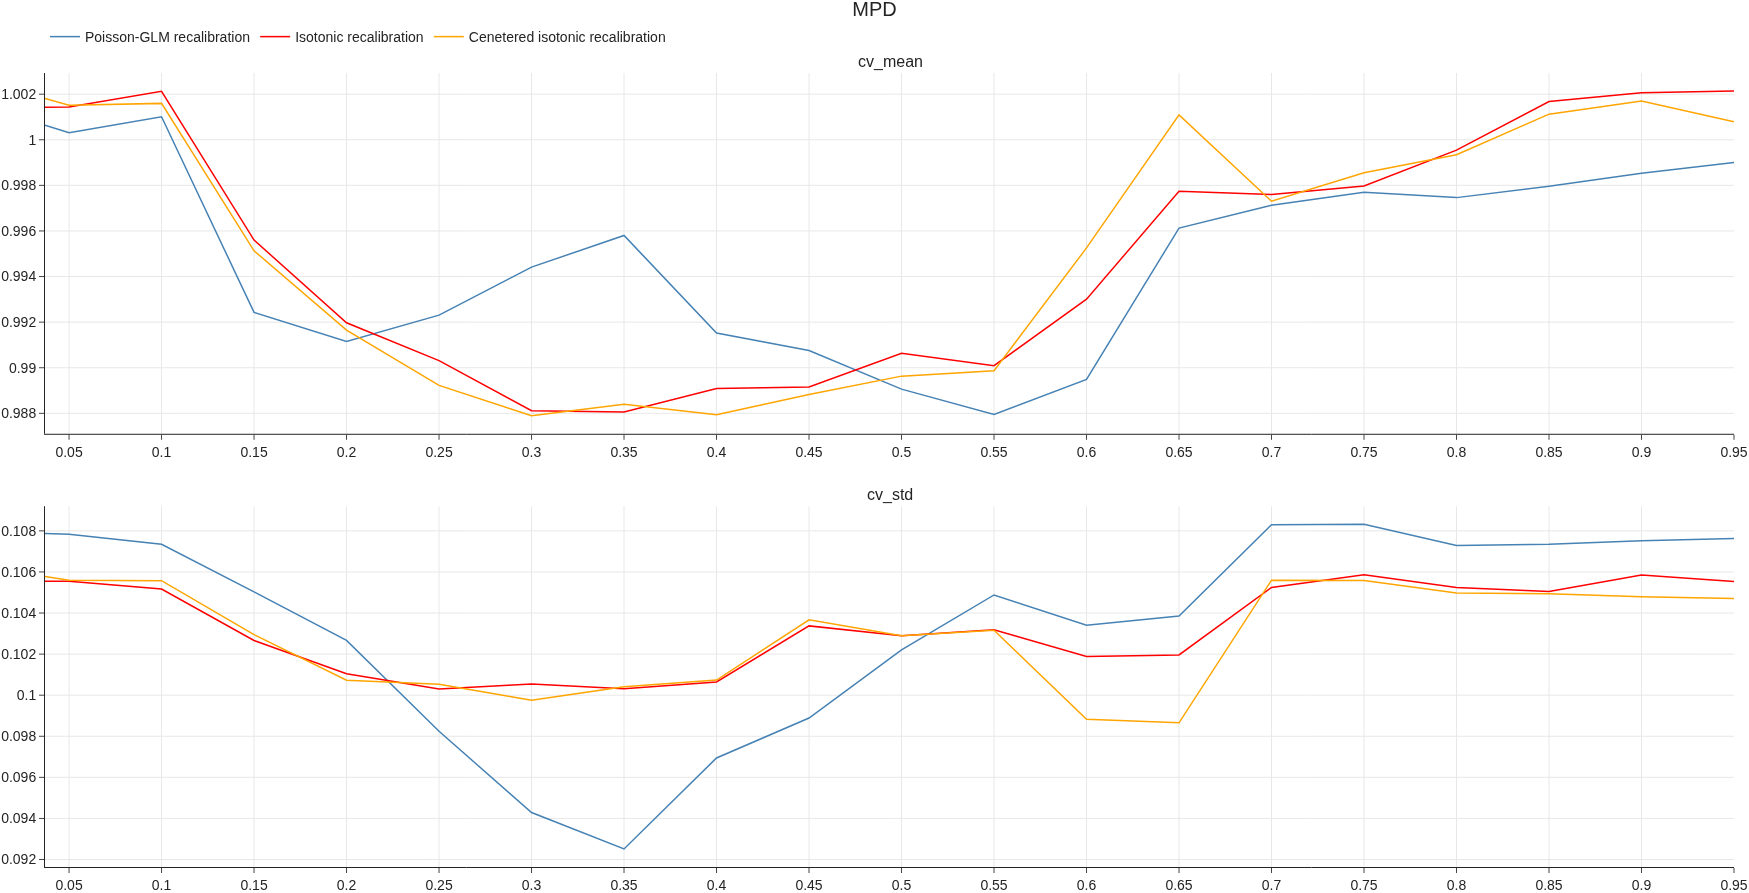

In [109]:
def get_stats_for_metric(metrics_cv_stats_lst: List[pd.DataFrame], ratios_lst: List[float], dataset: str, metric_short_name: str):
    idx = f"{dataset}_{metric_short_name}"
    df = pd.concat([metrics_cv_stats.loc[[idx],:] for metrics_cv_stats in metrics_cv_stats_lst])
    df.index = ratios_lst
    return df

def plot_means_and_std_cv_exps(metric: str, yscale: str = None):#(metric: MetricEnum):
    # metric = Metric.from_enum(metric)
    # metric_short_name = metric.get_short_name()
    # metric_name = metric.get_name()
    metric_short_name = metric
    metric_name = metric_short_name
    exp1_ts = get_stats_for_metric(exp1_metrics_cv_stats_lst, ratios_lst=ratios_lst, dataset="test", metric_short_name=metric_short_name)
    exp2_ts = get_stats_for_metric(exp2_metrics_cv_stats_lst, ratios_lst=ratios_lst, dataset="test", metric_short_name=metric_short_name)
    exp3_ts = get_stats_for_metric(exp3_metrics_cv_stats_lst, ratios_lst=ratios_lst, dataset="test", metric_short_name=metric_short_name)
    fig = plot_ts(exp1_ts, engine="plotly", name="Poisson-GLM recalibration", title=metric_name)
    plot_ts(exp2_ts, fig=fig, name="Isotonic recalibration", color="red")
    plot_ts(exp3_ts, fig=fig, name="Cenetered isotonic recalibration", color="orange")
    if yscale is not None:
        fig.update_yaxes(type=yscale)
    fig.show()

plot_means_and_std_cv_exps("MPD")

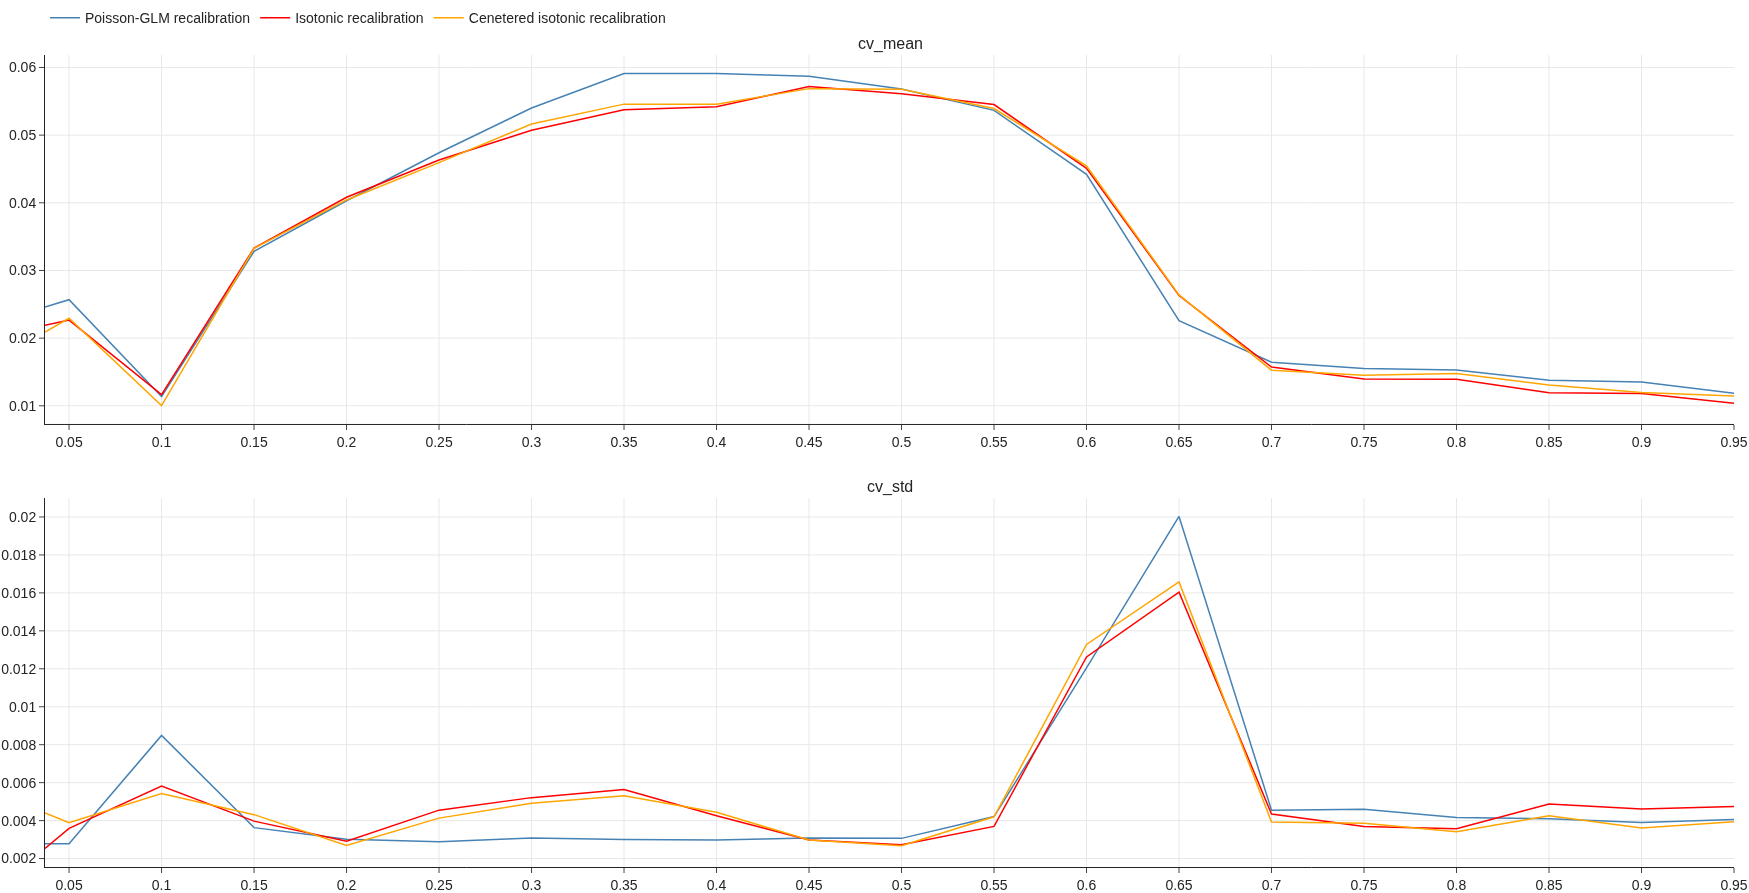

In [100]:
plot_means_and_std_cv_exps("SC")

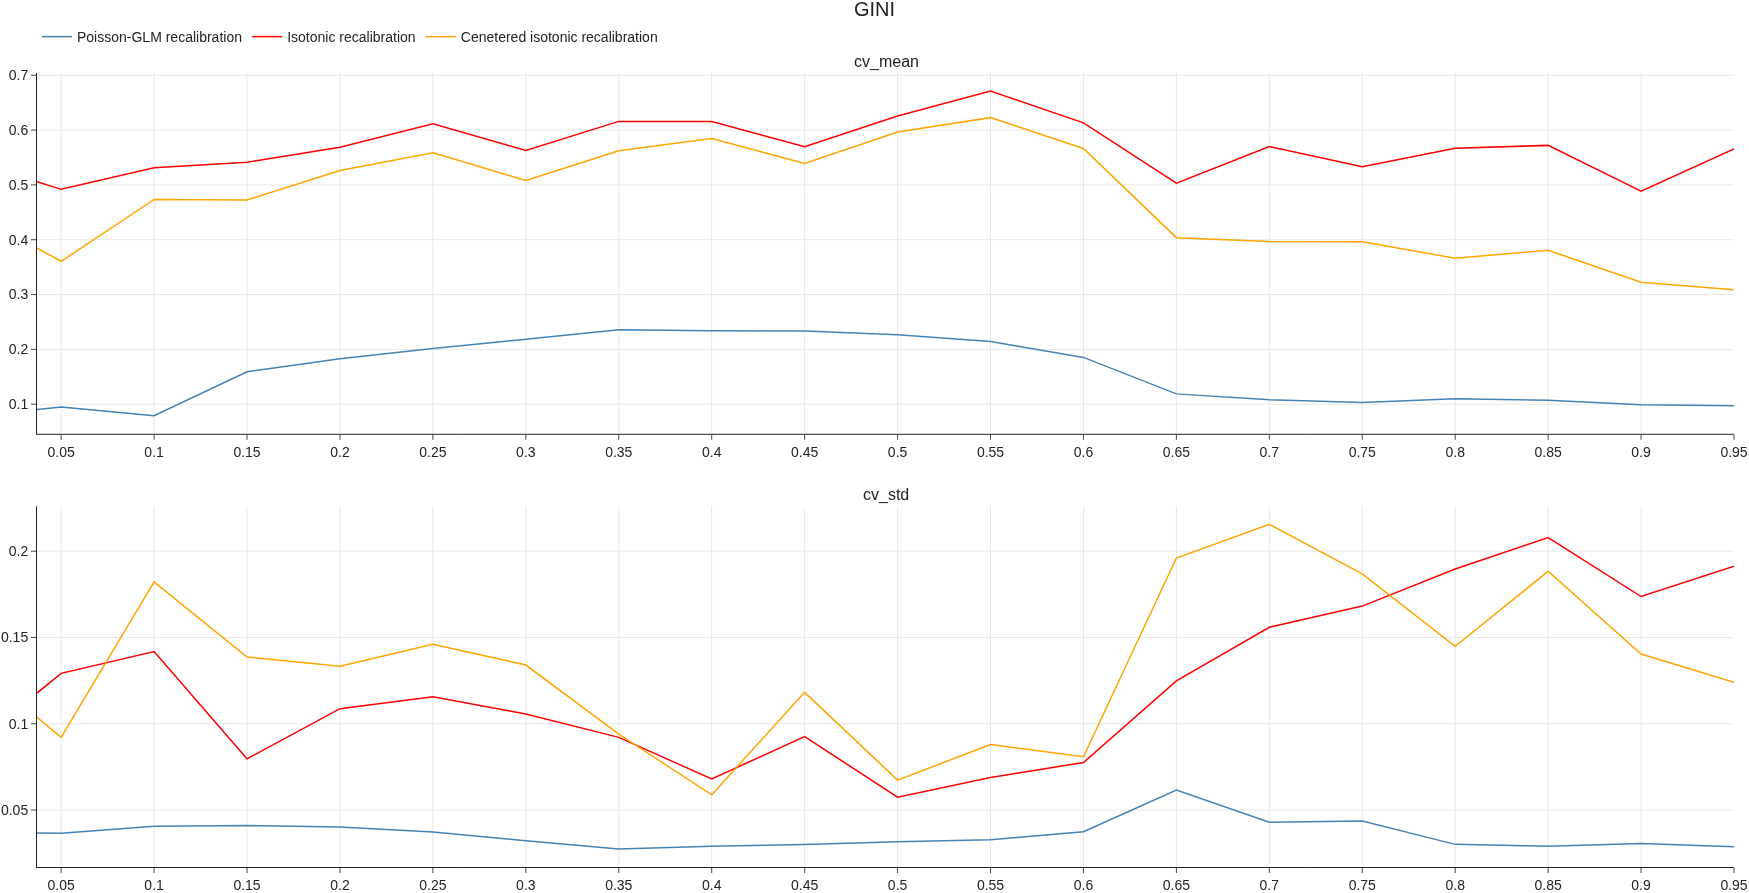

In [111]:
plot_means_and_std_cv_exps("GINI")

In [67]:
ratios_lst


[
    0.037,
    0.05,
    0.1,
    0.15,
    0.2,
    0.25,
    0.3,
    0.35,
    0.4,
    0.45,
    0.5,
    0.55,
    0.6,
    0.65,
    0.7,
    0.75,
    0.8,
    0.85,
    0.9,
    0.95
]